# Predict SLP from simulation data

## import modules

In [1]:
from numpy import genfromtxt
import numpy as np
import math
from pylab import *
import urllib
import os
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.metrics import mean_squared_error
from __future__ import division
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lmfit import Model
import pickle
pl.style.use('seaborn')
pl.rc('font',family='Arial')

## load model

In [2]:
sim_file = open('slpmodel.pkl', 'rb')
model = pickle.load(sim_file)
sim_file.close()

## input values to predict
Required input variables: field (mT), frequency (kHz), size (nm), K (kJ/m^3), alpha 
  
Data limits:  
field (mT): {6, 9, 12, 15, 18, 20}  
frequency (kHz): {176, 373, 744, 992}  
size (nm): {10, 10.5, ... 29.5, 30}  
K (kJ/m^3): {4, 5, 6, 7, 11}  
alpha: {0.5, 0.6, ... 0.9, 1}  

In [14]:
field = 9
frequency = 176
size = 25.2
K = 4
alpha = 1

## predict SLP value

In [15]:
p = model.predict([[field, frequency, size, K, alpha]])
print("predicted SLP = {}".format(p[0]))

predicted SLP = 0.2506381588095239


# Plot predicted point  
Input changed parameter:

In [16]:
changed_param = "size"

## import simulation data for plotting

In [6]:
dfs = []

for f in os.listdir('SLP'):
    if len(f) > 10:
        filename = 'SLP/' + f
        filedata = pd.read_csv(filename, delimiter=',')
        dfs.append(pd.DataFrame(filedata))
        
slpdata = pd.concat(dfs)

## take subset of data for plotting

In [17]:
sub = slpdata

if changed_param == "field": param = field
else: sub = sub[(sub['field'] == field)]

if changed_param == "frequency": param = frequency
else: sub = sub[(sub['frequency'] == frequency)]

if changed_param == "size": param = size
else: sub = sub[(sub['size'] == size)]

if changed_param == "K": param = K
else: sub = sub[(sub['K'] == K)]
    
if changed_param == "alpha": param = alpha
else: sub = sub[(sub['alpha'] == alpha)]

sub = sub.sort_values(by=changed_param)

## generate plot

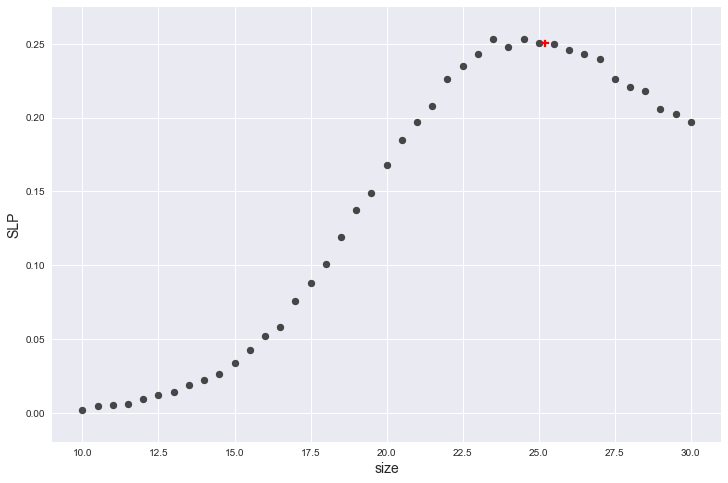

In [18]:
fig, ax = pl.subplots(figsize=(12,8))

scatter(sub[changed_param], sub['SLP'],c="black",alpha=0.7)
scatter(param, p, marker='P',c="red")
ylabel('SLP',fontsize=14)
xlabel(changed_param,fontsize=14)

show()